In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [0]:
df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [0]:
# 2018년 이후
data = df[df['start']>='2018-01-01T00:00:00.000000000']
data

,article_id,start,end,answered,votes,category,title,content
72119,77785,2018-01-01,2018-01-31,0,6,행정,아...이런데서 이상한 글이 올라오네요...,"이런 국민청원하는 게시판에서 뭐 섹스,희주야'''''이런 이상한 글 올라오는데 여기..."
72120,77786,2018-01-01,2018-01-31,0,1,기타,"현재 사람들 사이에서 유행하는 게임 ""배틀 그라운드"" 에 대한 제재를 가하려 합니다.","""배틀 그라운드""는 현재 세계적으로나 우리나라 에서나 매우 흥행 하는 게임입니다. ..."
72121,77787,2018-01-01,2018-01-31,0,0,정치개혁,양심수 석방 국가보안법 철폐,적폐청산의 시금석\n양심수들의 특별사면 배제\n문재인 정부를 규탄한다.\n지난 12...
72122,77788,2018-01-01,2018-01-31,0,3,인권/성평등,민주화유공자들에 대한 국가유공자 인정 요청,"안녕하세요.\n살벌한 독재시대를 떠나, 대한민국 민주화를 이룩하신 수많은 열사들이,..."
72123,77789,2018-01-01,2018-01-31,0,0,외교/통일/국방,UAE 관련,Uae 괸련한 야당 질의와 관련하여 기본적으로 유시민 작가의 말씀에 동의하여 국익에...
...,...,...,...,...,...,...,...,...
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."


In [0]:
ori_category = list(data.category.value_counts().index)
new_category = ['politics', 'etc', 'human_rights', 'traffic', 'safety/environment', \
               'diplomacy', 'education', 'welfare', 'jobs', 'administration', \
               'arts/press', 'future', 'economy', 'development', 'pets', \
               'birth_rate/aging', 'agriculture']
for o, n in zip(ori_category, new_category):
  data.category[data.category == o] = n

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# 가장 많은 Votes를 받은 Top5 DataFrame

In [0]:
# 가장 많은 Votes를 받은 Top5 DataFrame
data = data.sort_values(["votes"], ascending=[False])
data.head(5)

,article_id,start,end,answered,votes,category,title,content
313314,408609,2018-10-17,2018-11-16,0,1192049,safety/environment,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...
208597,269548,2018-06-13,2018-07-13,0,714875,diplomacy,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...
118970,142600,2018-02-19,2018-03-21,1,614127,arts/press,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달..."
183791,230552,2018-05-11,2018-06-10,1,419006,human_rights,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...
327873,426834,2018-10-31,2018-11-30,0,416093,human_rights,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....


# 3등분 pie plot 및 bar plot

In [0]:
# 20만 건 이상, 답변 받은 청원 수
accept = data[data['votes']>=200000]
accept_num = accept['votes'].count()
accept_num

72

In [0]:
# 10만 건 이상, 답변 못 받은 청원 수
unsolved = data[data['votes']<200000]
unsolved = data[data['votes']>=100000]
unsolved_num = unsolved['votes'].count()
unsolved_num

97

In [0]:
# 10만 건 이하, 청원 수
low_votes = data[data['votes']<100000]
low_votes_num = accept['votes'].count()
low_votes_num

72

In [0]:
%matplotlib inline 

In [0]:
import matplotlib.pyplot as plt

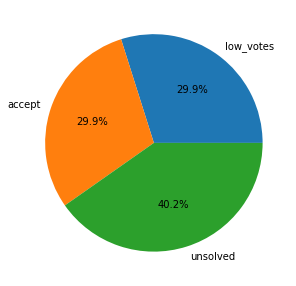

In [0]:
# 10만 건 단위로 청원 수 퍼센티지
label = ['low_votes', 'accept', 'unsolved']
data = [72, 72, 97]
plt.figure(figsize=(5, 5))
plt.pie(data, labels=label, autopct='%.1f%%')
plt.show()

In [0]:
import seaborn as sns

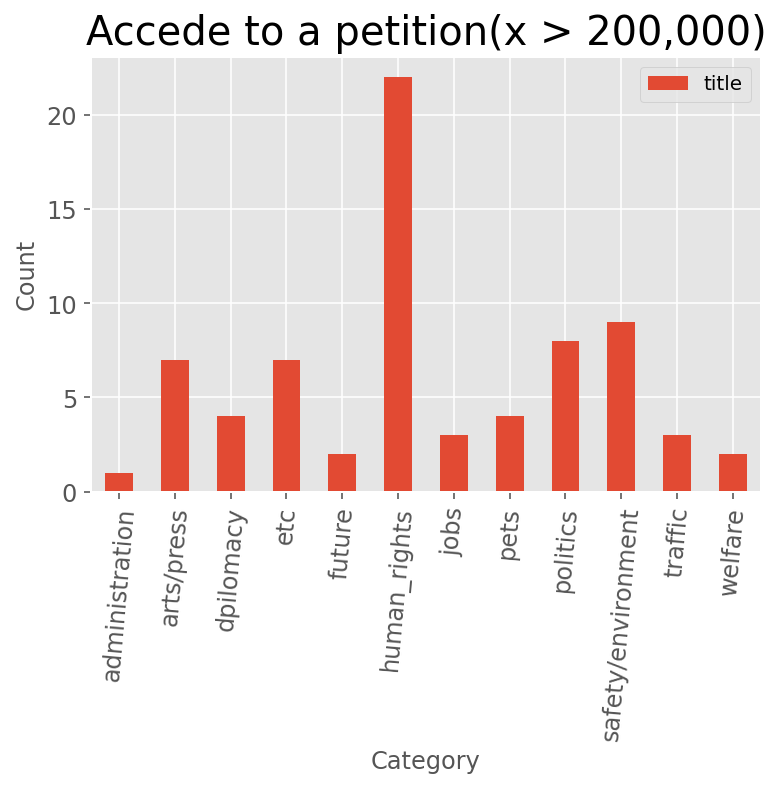

In [0]:
# 청원 답변 완료(x > 200,000) 중 카테고리별 count() - bar plot

mpl.font_manager._rebuild()
accept_c = accept.groupby(accept['category']).count()
accept_cc = accept_c.loc[:, ['title']]
accept_cc

ax = accept_cc.plot(kind='bar')

## title 넣기
ax.set_title("Accede to a petition(x > 200,000)", fontsize=20)
 
## x축 label 수정하기
ax.set_xlabel("Category")
 
 
## y축 label 수정하기
ax.set_ylabel("Count")
 
## legend 위치 조정
ax.legend(loc='best')

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(85)

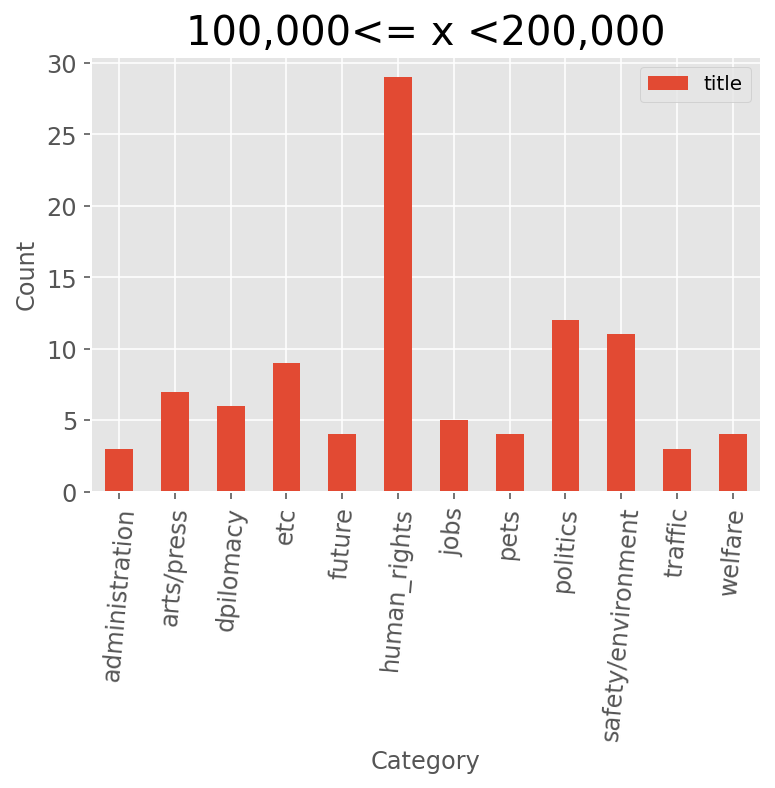

In [0]:
# 미해결 청원(십만 건 이상 이십만 건 미만) 중 카테고리별 count() - bar plot

unsolved_c = unsolved.groupby(unsolved['category']).count()
unsolved_cc = unsolved_c.loc[:, ['title']]
unsolved_cc

plt.style.use('ggplot')

ax = unsolved_cc.plot(kind='bar')

## title 넣기
ax.set_title("100,000<= x <200,000", fontsize=20)
 
## x축 label 수정하기
ax.set_xlabel("Category")
 
 
## y축 label 수정하기
ax.set_ylabel("Count")
 
## legend 위치 조정
ax.legend(loc='best')

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(85)

plt.show() 

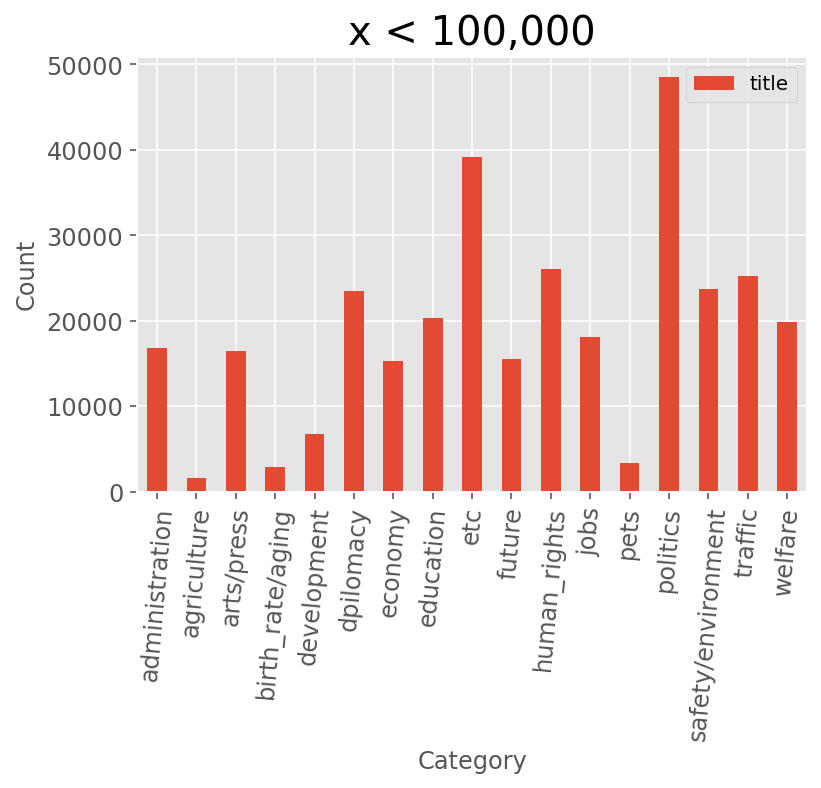

In [0]:
# 미해결 청원(십만 건 미만) 중 카테고리별 count() - bar plot

low_votes_c = low_votes.groupby(low_votes['category']).count()
low_votes_cc = low_votes_c.loc[:, ['title']]
low_votes_cc

plt.style.use('ggplot')

ax = low_votes_cc.plot(kind='bar')

## title 넣기
ax.set_title("x < 100,000", fontsize=20)
 
## x축 label 수정하기
ax.set_xlabel("Category")
 
 
## y축 label 수정하기
ax.set_ylabel("Count")
 
## legend 위치 조정
ax.legend(loc='best')

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(85)

plt.show() 

- 청원을 지지한 수를 **'0 ~ 100,000', '100,000 ~ 200,000 미만', '200,000 이상'**으로 나누었다.

- 위의 3단계를 각각 카테고리별로 몇 개의 청원이 올라왔는지 bar.plot으로 살펴보았다.

- 100,000 이상의 두 그래프의 경우 비슷한 양상을 보였으며, 주로 **'human_right'**에 국민의 많은 청원 및 지지율을 받았다.

- 100,000 이하 청원의 경우 **'politics'**와 **'etc'**가 각각 1, 2위이고, 답변을 받지 못했지만, 다양한 카테고리에 국민들이 관심을 갖는 것을 확인할 수 있었다.

# Kdeplot, distplot (Votes) 

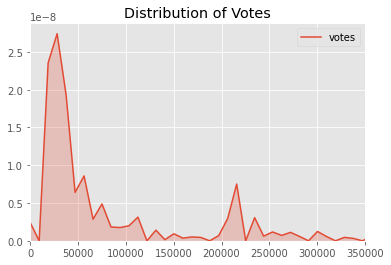

In [0]:
sns.kdeplot(data = data.votes, shade=True)
plt.title('Distribution of Votes')
plt.legend()
plt.xlim(0, 350000)
plt.style.use('ggplot')

plt.show()